# 1 . For the function J(w) = w^2 + (54/w), implement the following methods: (a) Use the bracketed value (that you got in the last lab) to get to the critical point employing interval halving method and (b) identify the critical point using Newton-Raphson method and (c) verify the result manually using the optimality criteria (post this write-up as well in .jpg/.png etc).

In [28]:
def J(w):
    if w != 0:
        return w**2 + (54/w)
    else:
        print(f"Function is not exist at {w}")
    

def exhaustive_search(J,a, b, n):
    step =(b-a)/n
    x1=a
    x2=a+step
    x3=a+2*step
    flag=0
    while flag!= 1:
       
        if J(x1) >= J(x2) <= J(x3):
            print(f'Minimum lies in [{x1},{x3}]')
            return [x1,x2]
            flag=1
        else:
            x1=x2
            x2=x3
            x3=x3+step
 
        if x3 >b:
            print('no minimum exists ')
            flag=1



#interval = exhaustive_search(a, b, n)

In [31]:
def interval_halving(J,a,b,n,eps):
    interval = exhaustive_search(J,a, b, n)
    c = interval[0]
    d = interval[1]
    l = d-c
    while abs(l)>eps:
        w1 = c+(l/4)
        w3 = d-(l/4)
        w2 = (c+d)/2
        if J(w1)< J(w2):
            d = w2
            w2 = w1
        elif J(w3)< J(w2):
            c = w2
            w2 = w3
        else:
            c = w1
            d = w3
        l = d-c
    return c
        
a = 1  # lower bound of the range
b = 5  # upper bound of the range
n = 100  # number of subdivisions
eps = 0.00001
root = interval_halving(J,a,b,n,eps)
print("Root of the function by interval halving method is:",root)

Minimum lies in [2.9600000000000017,3.040000000000002]
Root of the function by interval halving method is: 2.9999902343750016


In [24]:
def first_der_J(w):
    return 2*w - 54/(w**2)
def second_der_J(w):
    return 2 + (108/(w**3))

def Newton_Raphson(initial_guess,eps):
    w = initial_guess
   
    while abs(first_der_J(w))>eps:
        w = w - (first_der_J(w)/second_der_J(w))
        
    return w
        
initial_guess = 4
eps = 0.0001
root = Newton_Raphson(initial_guess,eps)
print("Root of the function by Newton Raphson method is:",root)

Root of the function by Newton Raphson method is: 2.9999999900621184


# 2.  Plot the surface J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2. Also, generated the corresponding contour plot. Label the plots appropriately. Give a suitable title for the figure.



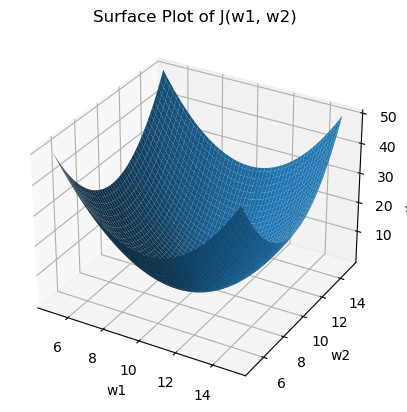

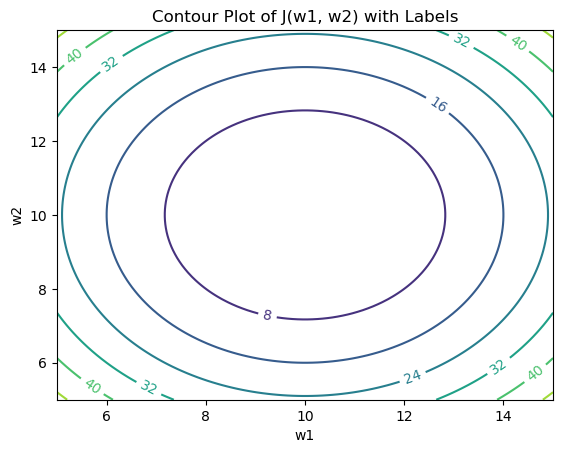

In [40]:
import numpy as np
import matplotlib.pyplot as plt


def J(w1, w2):
    return (w1 - 10)**2 + (w2 - 10)**2

# Generate a grid of values for w1 and w2
w1, w2 = np.meshgrid(np.linspace(5, 15, 100), np.linspace(5, 15, 100))

# Calculate the J values for the grid
Z = J(w1, w2)

# Create a 3D plot of the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w1, w2, Z)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('J(w1, w2)')
ax.set_title('Surface Plot of J(w1, w2)')

# Create a contour plot of the surface
plt.figure()
contour = plt.contour(w1, w2, Z)
plt.clabel(contour, inline=True, fontsize=10)
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour Plot of J(w1, w2) with Labels')

plt.show()


# 3. Using line (unidirectional) search, for the function (w1 - 10 )^2 + (w2 - 10)^2, find the minimum value along the direction (2, 5). You can assume the start point to be (2,1).  Plot the function and its contours along with the minimum value in that direction.



In [41]:
import numpy as np
def J(w1, w2):
    return (w1 - 10)**2 + (w2 - 10)**2

def grad_J(w1,w2):
    grad = np.array([2*(w1 - 10), 2*(w2 - 10)])
    return grad

def J_at_w_new(x):
    return 29*(x**2) - 122*x + 145

def unidirectional_search(a,b,n,search_direction, initial_point,eps):
    w = initial_guess
    s = search_direction
    alpha = interval_halving(J_at_w_new,a,b,n,eps)
    w_new = w + alpha*s 
    return w_new
a = 1
b = 10
n = 100
eps = 0.001
search_direction = np.array([2,5])
initial_point = np.array([2,1])
w_new = unidirectional_search(a,b,n,search_direction, initial_point,eps)
print("New point in that direction is:",w_new)

Minimum lies in [1.9900000000000007,2.1700000000000004]
New point in that direction is: [ 6.15859375 11.39648438]


# Contour plot of the function along with the minimum value in the given direction

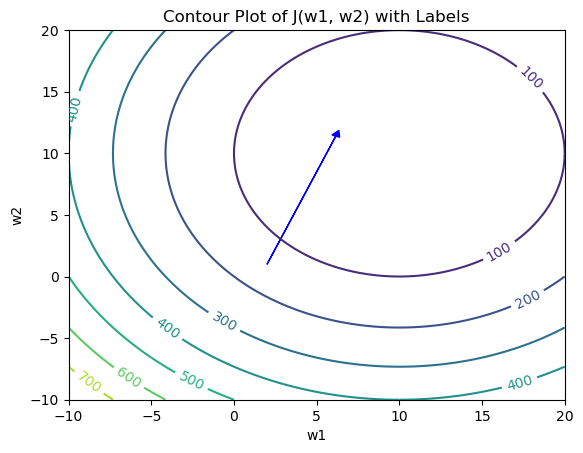

In [50]:
w1 = np.linspace(-10,20,100)
w2 = np.linspace(-10,20,100)
w1 , w2 = np.meshgrid(w1,w2)
s = initial_point
w = w_new
plt.figure()
contour = plt.contour(w1, w2, J(w1,w2), cmap='viridis')
arrow = plt.arrow(s[0], s[1], w[0] - s[0], w[1] - s[1], head_width=0.5, head_length=0.5, color='blue')
plt.clabel(contour, inline=True, fontsize=10)
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour Plot of J(w1, w2) with Labels')

plt.show()